
# Trabajo práctico 1
## Diferencias finitas - Ecuaciones diferenciales ordinarias (EDO)

**Entregar los problemas que se indican**


##Ejercicio 3 (entregar)


Considere el siguiente modelo de un sistema de reacciones químicas:
\begin{align}
\frac{dx}{dt} &= a - (b+1) x + x^2 y, \\
\frac{dy}{dt} &= b\,x - x^2 y,
\end{align}
donde $x$ e $y$ son las concentraciones, y $a$ y $b$ son parámetros. Resuelva numéricamente el sistema con un método RK4, y grafique las trayectorias en el espacio de fases $(x,y)$. Considere los siguientes casos.
1. Para $a=b=1$, y usando pasos $h=0.1$, $0.2$, $0.5$ y $1.0$, muestre numéricamente que las soluciones numéricas convergen al equilibrio, incluso para los pasos grandes.
2. Para $a=1$, $b=3$, muestre (numéricamente) que el equilibrio es inestable y que las trayectorias tienden a un ciclo límite. Pruebe distintas condiciones iniciales (tanto dentro del ciclo y cerca del punto fijo, como fuera de él). Use pasos $h=0.1$ y mayores, con cuidado. Verifique que a partir de cierto valor de $h$ las soluciones numéricas divergen. Los sistemas no lineales son chúcaros.




###Respuesta
Se definen tanto el sistema de ecuaciones del problema propuesto como la función que obtendrá la solución numérica por $RK4$

In [4]:
#Importo librerías
import numpy as np
from sympy.core.function import Function

ModuleNotFoundError: No module named 'sympy'

In [5]:
a=1
b=1
def f(x:np.float64,y:np.float64)->np.array:
    return np.array([a-(b+1)*x + x*x*y, b*x - x*x*y])


def correcciones(f:Function,h:np.float64,x:np.float64,y:np.float64)->np.array:
    k1= h * f(x, y)

    k2 = h * f(x + k1[0]/2, y+ k1[1]/2)

    k3 = h * f(x + k2[0]/2, y+ k2[1]/2)
    k4 = h * f(x + k3[0], y + k3[1])

    return np.array([
        x + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6,
        y + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
    ])


def rungeKutta(h:np.float64, x0:np.float64, y0:np.float64)->np.array:

    xrk = np.array([x0])
    yrk = np.array([y0])
    i=0
    while i*h<20:
        p = correcciones(f,h,xrk[i],yrk[i])
        xrk = np.append(xrk,p[0])
        yrk = np.append(yrk,p[1])
        i+=1

    return np.array([xrk, yrk])



NameError: name 'Function' is not defined

En la función que evalua $RK4$ se calcula la solución numérica teniendo en cuenta 4 pasos diferentes, todos ellos con valores altos.

In [ ]:
x_list1, y_list1 = rungeKutta(0.1,1,0)

x_list2, y_list2 = rungeKutta(0.2,1,0)

x_list3, y_list3 = rungeKutta(0.5,1,0)

x_list4, y_list4 = rungeKutta(1,1,0)

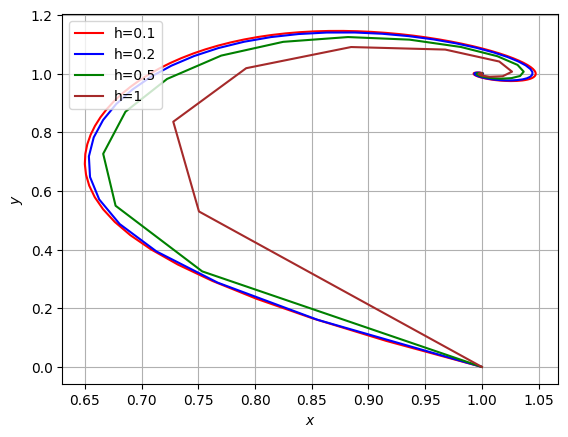

In [ ]:

plt.plot(x_list1, y_list1, color='red', label="h="+str(0.1))

plt.plot(x_list2, y_list2, color='blue', label="h="+str(0.2))

plt.plot(x_list3, y_list3, color='green', label="h="+str(0.5))

plt.plot(x_list4, y_list4, color='brown', label="h="+str(1))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc ="upper left")
plt.grid()
plt.show()

Y al graficarlos se observa que la solución de la ecuación converge a un punto independientemente del salto que se tome para $h$. Este es el comportamiento que se obtiene de la reacción usando los parámetros $a=b=1$.

Si evaluamos el parámetro $b=3$ el comportamiento de la función es muy diferente.

In [ ]:
b=3
x0 = 1.0
y0 = 1.2

x_list1, y_list1 = rungeKutta(0.1,x0,y0)
x_list2, y_list2 = rungeKutta(0.1,1.7,3)
x_list3, y_list3 = rungeKutta(0.2,x0,y0)
x_list4, y_list4 = rungeKutta(0.2,1.7,3)
x_list5, y_list5 = rungeKutta(0.3,x0,y0)
x_list6, y_list6 = rungeKutta(0.3,1.7,3)
x_list7, y_list7 = rungeKutta(0.4,x0,y0)
x_list8, y_list8 = rungeKutta(0.4,1.7,3)

<ipython-input-11-f871a368593a>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.array([a-(b+1)*x + x*x*y, b*x - x*x*y])
<ipython-input-11-f871a368593a>:16: RuntimeWarning: invalid value encountered in double_scalars
  x + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6,
<ipython-input-11-f871a368593a>:17: RuntimeWarning: invalid value encountered in double_scalars
  y + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6
<ipython-input-11-f871a368593a>:10: RuntimeWarning: invalid value encountered in double_scalars
  k2 = h * f(x + k1[0]/2, y+ k1[1])


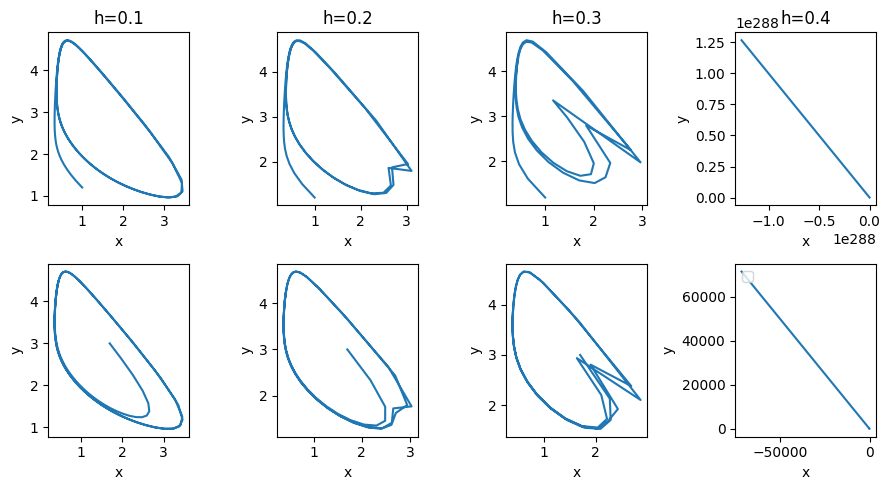

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ex1, ex2, ex3, ex4)) = plt.subplots(2,4)

ax1.plot(x_list1, y_list1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('h=0.1')
ex1.plot(x_list2, y_list2)
ex1.set_xlabel('x')
ex1.set_ylabel('y')


ax2.plot(x_list3, y_list3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('h=0.2')
ex2.plot(x_list4, y_list4)
ex2.set_xlabel('x')
ex2.set_ylabel('y')

ax3.plot(x_list5, y_list5)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('h=0.3')
ex3.plot(x_list6, y_list6)
ex3.set_xlabel('x')
ex3.set_ylabel('y')

ax4.plot(x_list7, y_list7)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title('h=0.4')
ex4.plot(x_list8, y_list8)
ex4.set_xlabel('x')
ex4.set_ylabel('y')


fig.set_size_inches(9, 5)



plt.legend(loc ="upper left")
fig.tight_layout()
plt.show()

Para valores de $h>0.3$ la solución diverge, en cambio, para valores menores a este, se observa una condición de equilibrio en la que alrededor de determinado punto crítico se mueven las concentraciones de forma ciclíca. Este comportamiento se mantiene al ubicar las concentraciones cercanas al punto critico o lejanas a este para el momento inicial (punto inicial dentro o fuera de la "orbita") dando a ver cierta estabilidad en la solución, a pesar de mostrar para valores no tan pequeños de $h$ inestabilidad numérica en una de las regiones de mayor curvatura.

##Ejercicio 4 (entregar)

Modifique el programa del problema anterior para que use un paso adaptativo. Es decir, sea $y_1$ la solución usando paso $h$ e $y_2$ usando $h/2$. Considere su diferencia:
$$
\Delta = |y_2 - y_1|,
$$
y una tolerancia $\epsilon = 10^{-5}$. Programe la siguiente estrategia para ajustar el paso $h$:
* Si $\Delta < \epsilon/2$: acepto $y_2$ y multiplico el paso por 1.5.
* Si $\epsilon/2 < \Delta < \epsilon$: acepto $y_2$ y mantengo el paso.
* Si $\epsilon < \Delta$: rechazo $y_2$, divido el paso por 1.5 y vuelvo a calcular.  

Para $a=1$, $b=3$, grafique las soluciones numéricas $x(t)$ e $y(t)$ y la trayectoria en el espacio de fases, señalando cómo se adapta el paso en los regímenes de variación rápida del oscilador.

Contando la cantidad de pasos en un ciclo, estime la ventaja del algoritmo con respecto a un RK4 de paso fijo con la misma precisión (necesitará un $h\approx 0.01$).

Considere una tolerancia distinta ($\epsilon=10^{-2}$, por ejemplo) y discuta las diferencias.


Si tiene ganas, considere también otros valores del factor de multiplicación del paso (en muchos libros recomiendan el valor 2 en lugar de 1.5, por ejemplo). ¿Qué ocurre con la discretización del tiempo?





###Respuesta
Se redefine $RK4$ de forma que tome un paso adaptativo en función de las varaciones para dos valores de $h$. Para esto se exige que la norma del vector de la diferencia entre los puntos predichos por el método para los dos valores de $h$ sean cercanos a determinado nivel. Particularmente me resulta lento este método, al punto de necesitar evaluar la cercania de los puntos para un orden menor al pedido en el problema.

In [ ]:
e = 0.00001
def rungeKuttaDinamico(h:np.float64, x0:np.float64, y0:np.float64)->np.array:

    #Runge Kutta 4
    xrk = np.array([x0])
    yrk = np.array([y0])
    trk = np.array([0])
    i=0

    while (trk[-1]<20):

        p1 = correcciones(f,h,xrk[i],yrk[i])
        p_intermedio = correcciones(f,h/2,xrk[i],yrk[i])
        p2 = correcciones(f,h/2,p_intermedio[0],p_intermedio[1])
        r = np.linalg.norm(p1-p2)
        if (r<e/2):
            trk = np.append(trk, trk[i]+h/2)
            h=h*1.5
            xrk = np.append(xrk,p2[0])
            yrk = np.append(yrk,p2[1])
        elif (r<e):
            trk = np.append(trk, trk[i]+h/2)
            xrk = np.append(xrk,p2[0])
            yrk = np.append(yrk,p2[1])
        else:
            h=h/1.5
            continue
        i+=1
    return np.array([xrk, yrk, trk])

Pendiente a revisar el motivo por el cual resulta tan lento el método, realiza muchas mas evaluaciones que su análogo con valor de $h$ fijo, hecho que hace ver que (probablemente) la elección del valor de $h$ no sea precisa y se este sobreexigiendo en regiones en las que realmente podia tomar pasos mas largos dada la baja curvatura de la trayectoria en el espacio de configuraciones.

In [ ]:
start = time()

x_list, y_list, t_list = rungeKuttaDinamico(0.01,1,0.4)

end = time()
print(end - start)


0.7886087894439697


In [ ]:
start = time()
x_list2, y_list2 = rungeKutta(0.01,1,0.4)
end = time()
print(end - start)
print("RK4: " + str(len(x_list2)) + "\nRK4 Adaptativo: " + str(len(x_list)))

0.11027860641479492
RK4: 2001
RK4 Adaptativo: 7957


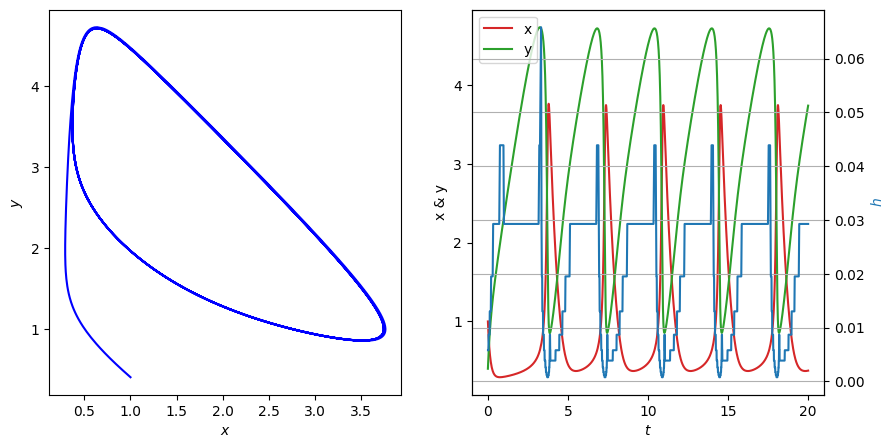

In [ ]:
fig, (ax1, ax3) = plt.subplots(1,2)

ax1.plot(x_list, y_list,'-', color='blue', label="$h$ dinamico")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")

ax3.plot(t_list,x_list, color='tab:red', label='x')
ax3.plot(t_list,y_list, color='tab:green', label='y')
ax3.set_xlabel('$t$')
ax3.set_ylabel('x & y')

ax2 = ax3.twinx()
ax2.plot(t_list[1:], [t_list[i]-t_list[i-1] for i in range(1, len(t_list))], color='tab:blue', label='t')
ax2.set_ylabel("$h$",color='tab:blue')
ax3.legend(loc ="upper left")
fig.set_size_inches(10, 5)
plt.grid()
plt.show()

Las graficas muestran como se modifica en valor de $h$ para las zonas de mayor curvatura y su variación en el tiempo. Se graficaron $20s$ de tiempo propio para tener más de un ciclo en la trayectoria límite del espacio de configuraciones.

Si contemplamos $e=10^{-2}$ para la diferencia para los puntos obtenidos en $RK4$ adaptativo obtenemos la misma forma de las curvas, sigue siendo una precisión suficientemente buena la utilizada ante este paso, pero se nota el aumento en los valores de $h$.

In [ ]:
e=0.01
x_list, y_list, t_list = rungeKuttaDinamico(1,1,0.4)


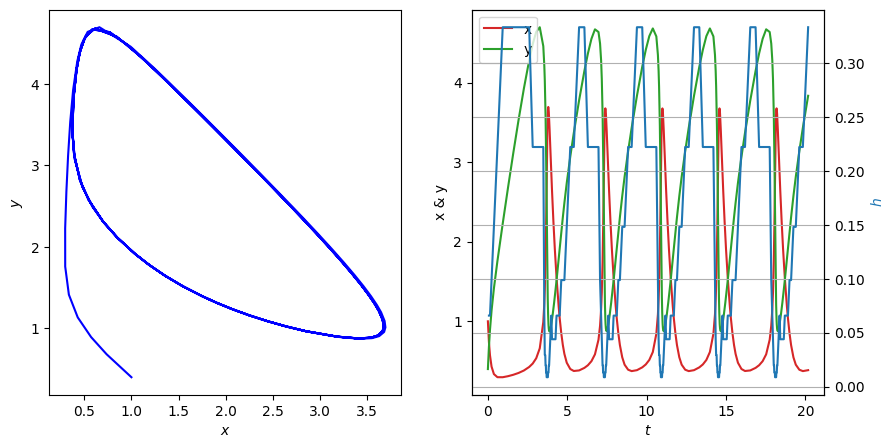

In [ ]:
fig, (ax1, ax3) = plt.subplots(1,2)

ax1.plot(x_list, y_list,'-', color='blue', label="$h$ dinamico")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")

ax3.plot(t_list,x_list, color='tab:red', label='x')
ax3.plot(t_list,y_list, color='tab:green', label='y')
ax3.set_xlabel('$t$')
ax3.set_ylabel('x & y')

ax2 = ax3.twinx()
ax2.plot(t_list[1:], [t_list[i]-t_list[i-1] for i in range(1, len(t_list))], color='tab:blue', label='t')
ax2.set_ylabel("$h$",color='tab:blue')
ax3.legend(loc ="upper left")
fig.set_size_inches(10, 5)
plt.grid()
plt.show()

La literatura recomienda utilizar el método con $h$ adaptativo variando el valor de $h$ por un facotor de $2$, en este caso observamos que

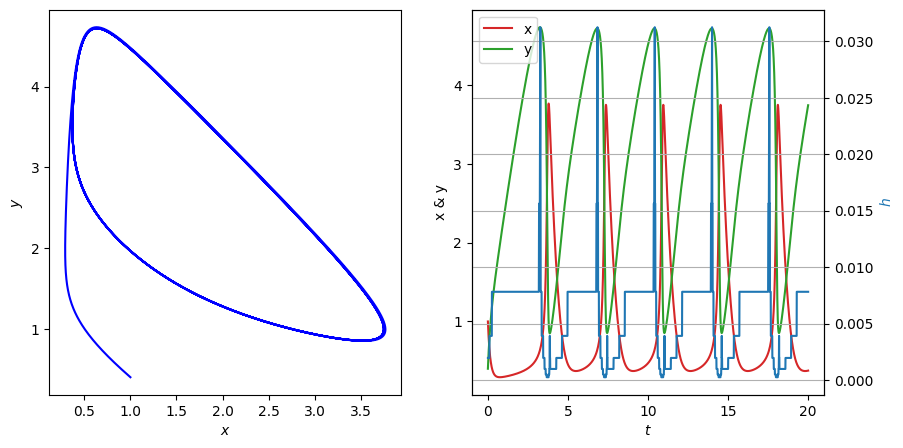

In [ ]:
e = 0.00001
def rungeKuttaDinamico(h:np.float64, x0:np.float64, y0:np.float64)->np.array:

    #Runge Kutta 4
    xrk = np.array([x0])
    yrk = np.array([y0])
    trk = np.array([0])
    i=0

    while (trk[-1]<20):

        p1 = correcciones(f,h,xrk[i],yrk[i])
        p_intermedio = correcciones(f,h/2,xrk[i],yrk[i])
        p2 = correcciones(f,h/2,p_intermedio[0],p_intermedio[1])
        r = np.linalg.norm(p1-p2)
        if (r<e/2):
            trk = np.append(trk, trk[i]+h/2)
            h=h*2
            xrk = np.append(xrk,p2[0])
            yrk = np.append(yrk,p2[1])
        elif (r<e):
            trk = np.append(trk, trk[i]+h/2)
            xrk = np.append(xrk,p2[0])
            yrk = np.append(yrk,p2[1])
        else:
            h=h/2
            continue
        i+=1
    return np.array([xrk, yrk, trk])

x_list, y_list, t_list = rungeKuttaDinamico(1,1,0.4)
fig, (ax1, ax3) = plt.subplots(1,2)

ax1.plot(x_list, y_list,'-', color='blue', label="$h$ dinamico")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")

ax3.plot(t_list,x_list, color='tab:red', label='x')
ax3.plot(t_list,y_list, color='tab:green', label='y')
ax3.set_xlabel('$t$')
ax3.set_ylabel('x & y')

ax2 = ax3.twinx()
ax2.plot(t_list[1:], [t_list[i]-t_list[i-1] for i in range(1, len(t_list))], color='tab:blue', label='t')
ax2.set_ylabel("$h$",color='tab:blue')
ax3.legend(loc ="upper left")
fig.set_size_inches(10, 5)
plt.grid()
plt.show()

Al utilizar el factor de correccion para el intervalo temporal $h% como $2$ se pierden valores intermedios, y como resultado se toman cambios mas bruscos en el tamaño de los intervalos temporales. Esto podría ser de gran utilidad en sistemas que tengan no solo regiones de alta curvatura, sino donde la curvatura varía muy rapidamente y es necesario reajustar el valor del paso temporal en la menor cantidad de operaciones posibles.

##Ejercicio 5

Considere un “péndulo elástico”, como aproximación realista de un péndulo
verdadero. El mismo consiste en un resorte de longitud natural $l_0$ y constante
elástica $k$. Uno de sus extremos está fijo, y del otro pende una masa $m$.
Suponga que el movimiento es en un plano, y que el resorte no se dobla
cuando se contrae o estira.
1. Encuentre las ecuaciones de movimiento.
2. Programe una resolución numérica con un método RK4.
3. Grafique trayectorias de la masa en el plano de oscilación, para distintos valores de $k$ (fijando $m$, $l_0$ y $g$). Describa los movimientos que se
observan.
4. Si el resorte es muy duro ($k \gg 1$), el sistema es aproximadamente un
péndulo simple. Grafique la coordenada angular en función del tiempo
para un rango de valores de k, a partir de este régimen. Observe lo que
ocurre con el período de la oscilación.
5. Cuando un péndulo es utilizado dentro de un mecanismo de relojería,
más que el período verdadero (que hace cosas raras, como verá en el punto anterior), lo que realmente interesa es el tiempo entre pasadas consecutivas por la vertical, en la misma dirección. Grafique esta magnitud en
función de k. Discuta lo que ocurre y por qué.

**Nota sobre los parámetros**: Para empezar, le sugerimos $k = 10$,
$l_0 = 1$, $m = 1$, $g = 10$. Para las condiciones iniciales, considere un
estiramiento del $10\%$ del resorte y una desviación $\theta_0 = 0.1$ radianes, con velocidades iniciales nulas. Para las partes **4** y **5**, manténgase
en el régimen de pequeñas oscilaciones.

**Nota sobre las coordenadas**: Le recomendamos usar las siguientes
coordenadas generalizadas: $r$, estiramiento a partir de $l_0$ , y $\theta$, apartamiento de la vertical.